In [ ]:
!pip install torchutils

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
from torchvision import io
from torchsummary import summary
import torchutils as tu

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import ssl
import urllib.request

# Отключение проверки SSL-сертификата
ssl._create_default_https_context = ssl._create_unverified_context

# response = urllib.request.urlopen(url)


In [ ]:
# Присваивает значение 'cuda' переменной 'device', если функция torch.cuda.is_available() возвращает True,
# в противном случае присваивает значение 'cpu' переменной 'device'.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Выводит значение переменной 'device'.
print(device)


cuda


В этом коде мы проверяем, доступен ли CUDA (Compute Unified Device Architecture) на системе с помощью функции `torch.cuda.is_available()`. Если CUDA доступен, переменной `device` присваивается строковое значение `'cuda'`, что указывает на использование GPU для вычислений. Если CUDA недоступен, переменной `device` присваивается строковое значение `'cpu'`, что указывает на использование CPU для вычислений.


### resnet50

In [ ]:
!pip install kaggle


Чтобы загрузить файлы в Google Colab из Kaggle, выполните следующие шаги:

Шаг 1: Установка и импорт необходимых пакетов Установите пакет kaggle с помощью следующей команды:
!pip install kaggle

Импортируйте пакет kaggle:
import kaggle

Шаг 2: Получение аутентификационного токена API Kaggle

Зайдите на Kaggle (https://www.kaggle.com/) и войдите в свою учетную запись или зарегистрируйтесь, если у вас еще нет аккаунта.
Перейдите в свой профиль, нажав на свое имя в правом верхнем углу страницы.
Прокрутите вниз до раздела API и нажмите кнопку "Create New API Token". Файл kaggle.json будет загружен на ваш компьютер.

Шаг 3: Загрузка файла kaggle.json в Google Colab

Зайдите в Google Colab (https://colab.research.google.com/) и создайте новую записную книжку или откройте существующую.
Зайдите в секцию "Files" в боковой панели слева.

Нажмите на кнопку "Upload" и выберите файл kaggle.json, который вы загрузили с Kaggle. Файл будет загружен в рабочую среду Colab.

Шаг 4: Перемещение файла kaggle.json в правильную директорию

Откройте ячейку кода в Colab и выполните следующую команду, чтобы переместить файл kaggle.json в директорию ~/.kaggle/:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Дайте разрешение на выполнение команды с помощью команды:

!chmod 600 ~/.kaggle/kaggle.json

Шаг 5: Загрузка данных из Kaggle в Google Colab

Найдите набор данных на Kaggle, который вы хотите загрузить.
Скопируйте API-команду загрузки, которую можно найти на странице набора данных на Kaggle.
Вставьте скопированную команду загрузки в ячейку кода в Colab и запустите ее. Например:

!kaggle datasets download -d username/dataset-name

где username - ваше имя пользователя Kaggle, а dataset-name - название набора данных.

Файлы набора данных будут загружены в текущую рабочую директорию в Colab.
Теперь вы можете использовать загруженные файлы в своем коде на Google Colab.
Обратите внимание, что вы должны заменить username и dataset-name на фактические значения, соответствующие набору данных, который вы хотите загрузить.
Надеюсь, эти пошаговые инструкции помогут вам загрузить данные из Kaggle в Google Colab.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign


100% 324M/325M [00:18<00:00, 20.2MB/s]
100% 325M/325M [00:18<00:00, 18.1MB/s]


In [ ]:
!unzip /content/skin-cancer-malignant-vs-benign.zip;

Archive:  /content/skin-cancer-malignant-vs-benign.zip
replace data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import kaggle


In [ ]:
# импортируем модель и ее веса
# Импортируем модули resnet50 и ResNet50_Weights из пакета torchvision.models
from torchvision.models import resnet50, ResNet50_Weights

# Создаем модель resnet50 с использованием параметров по умолчанию
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# Выводим модель
model;


In [ ]:
# Меняем выходной слой
# Присваиваем атрибуту fc модели объект класса Linear с размерностями (2048, 1)
model.fc = nn.Linear(1000, 1)

model.fc

Linear(in_features=2048, out_features=1, bias=True)

Устанавливая `nn.Linear(2048, 1)`, мы создаем линейное преобразование, которое будет принимать входные данные размерности 2048 и выдавать одно значение. Таким образом, мы изменяем последний слой модели на линейный слой с одним выходным узлом. Это может быть полезно, например, при решении задачи бинарной классификации.

Использование линейного слоя с одним выходом намекает на то, что модель теперь будет предсказывать вероятность отнесения входных данных к одному из двух классов (0 или 1).

In [ ]:
#Аугментация

# Создаем объект trnsform_train с помощью Compose, который объединяет несколько преобразований
# Преобразования включают изменение размера изображения до (224, 224),
# случайное горизонтальное отражение с вероятностью 0.5,
# случайное вращение на угол до 10 градусов
# и преобразование изображения в тензор
trnsform_train = T.Compose([
    T.Resize((224, 224)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=10),
    T.ToTensor()
])

# Создаем объект trnsform_valid с помощью Compose, который объединяет несколько преобразований
# Преобразования включают изменение размера изображения до (224, 224)
# и преобразование изображения в тензор
trnsform_valid = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
])



В этом коде мы создаем объекты `trnsform_train` и `trnsform_valid`, которые используются для преобразования данных перед их использованием в модели.

- Для объекта `trnsform_train` мы создаем последовательность преобразований с помощью функции `Compose`. Эта последовательность включает следующие операции:
  - `Resize((224, 224))`: Изменяет размер изображения до (224, 224) пикселей.
  - `RandomHorizontalFlip(p=0.5)`: Случайное горизонтальное отражение изображения с вероятностью 0.5. Это помогает аугментировать данные и разнообразить тренировочный набор.
  - `RandomRotation(degrees=10)`: Случайное вращение изображения на угол до 10 градусов. Это также служит для аугментации данных.
  - `ToTensor()`: Преобразует изображение в тензор, который может быть использован моделью.

- Для объекта `trnsform_valid` мы также создаем последовательность преобразований с помощью функции `Compose`. В этом случае, мы используем только два преобразования:
  - `Resize((224, 224))`: Изменяет размер изображения до (224, 224) пикселей.
  - `ToTensor()`: Преобразует изображение в тензор.

Объекты `trnsform_train` и `trnsform_valid` могут быть использованы при обработке тренировочных и проверочных данных соответственно, чтобы привести их к нужному формату перед подачей на вход модели.

In [ ]:
# Создаем объект train_dataset с помощью класса ImageFolder из модуля datasets
# Передаем путь к папке с тренировочными изображениями '/content/train'
# и применяем преобразования, определенные в объекте trnsform_train
train_dataset = datasets.ImageFolder('/content/train', transform=trnsform_train)

# то же самое только для валидационных данных
valid_dataset = datasets.ImageFolder('/content/test', transform=trnsform_valid)



В этом коде мы создаем объекты `train_dataset` и `valid_dataset`, которые представляют собой наборы данных для тренировки и проверки модели.

- Для объекта `train_dataset` мы используем класс `ImageFolder` из модуля `datasets`. Этот класс предназначен для работы с наборами данных, где каждый класс представлен отдельной папкой соответствующего имени. Мы передаем путь к папке с тренировочными изображениями '/content/train' и указываем, что нужно применить преобразования, определенные в объекте `trnsform_train`.

Объекты `train_dataset` и `valid_dataset` представляют собой наборы данных, которые могут быть использованы для обучения и проверки модели соответственно.

In [ ]:
# Создаем объект train_loader с помощью класса DataLoader из модуля data
# Передаем объект train_dataset в качестве набора данных для загрузки
# Указываем размер пакета (batch_size) равным 32
# Аргумент shuffle=True указывает на необходимость перемешивания данных перед каждой эпохой обучения
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# то же самое только для валидационных данных
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)


В этом коде мы создаем объекты `train_loader` и `valid_loader`, которые представляют собой загрузчики данных для тренировочного и проверочного наборов.

- Для объекта `train_loader` мы используем класс `DataLoader` из модуля `torch.utils.data`. Этот класс предназначен для загрузки данных в модель. Мы передаем объект `train_dataset` в качестве набора данных для загрузки, указываем размер пакета (batch_size), который равен 32, и указываем, что данные должны быть перемешаны перед каждой эпохой обучения (shuffle=True).


In [ ]:
# Замораживаем все, чтобы разморозить только нужное
# Итерируемся по всем параметрам модели с помощью цикла for
for p in model.parameters():
    # Устанавливаем флаг requires_grad в False для каждого параметра p
    # Флаг requires_grad указывает, нужно ли вычислять градиенты для данного параметра во время обратного распространения ошибки
    p.requires_grad = False


В этом коде мы проходим через все параметры модели (`model`) и устанавливаем флаг `requires_grad` в `False` для каждого параметра. Флаг `requires_grad` определяет, нужно ли вычислять градиенты для данного параметра во время обратного распространения ошибки.

Установка `requires_grad` в `False` означает, что эти параметры не будут обновляться во время обучения модели. Это может быть полезно, когда нам не нужно изменять или обучать определенные параметры, например, если мы замораживаем предобученные слои модели и хотим сохранить их значения.

In [ ]:
# Устанавливаем флаг requires_grad в True для весов и смещения на третьем слое классификатора модели
model.classifier[3].weight.requires_grad = True
model.classifier[3].bias.requires_grad = True

# Перемещаем модель на устройство (device)
model.to(device)


AttributeError: ignored

Установка `requires_grad` в `True` означает, что эти параметры будут обновляться во время обучения модели. Это может быть полезно, если мы хотим, чтобы определенные слои или параметры были подвержены обучению и адаптировались к данным.

In [ ]:
# Создаем оптимизатор Adam для обновления параметров модели
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

# Используем функцию потерь BCEWithLogitsLoss для оценки ошибки
criterion = torch.nn.BCEWithLogitsLoss()


В этом коде мы создаем оптимизатор `Adam` для обновления параметров модели. Оптимизаторы используются для настройки весов модели в процессе обучения. В данном случае, мы передаем `model.parameters()` в качестве аргумента функции `Adam`, чтобы указать оптимизатору, какие именно параметры модели нужно обновлять. Мы также задаем значение learning rate (`lr`) равное 0.005, которое контролирует скорость обучения модели.

Затем мы создаем функцию потерь `BCEWithLogitsLoss()`. Эта функция используется для оценки ошибки между прогнозами модели и истинными значениями целевой переменной. В данном случае, функция потерь `BCEWithLogitsLoss()` предназначена для задач бинарной классификации.

In [ ]:
def compute_batch_accuracy(preds, labels):
    preds_reshaped = preds.squeeze(-1)
    # print(preds_reshaped)
    preds_sigmoid  = preds_reshaped.sigmoid()
    # print(preds_sigmoid)
    preds_classes  = torch.round(preds_sigmoid)
    # print(preds_classes)
    bool_array     = preds_classes == labels
    # print(bool_array)
    number_of_true = bool_array.sum()
    # print(number_of_true)
    accuracy       = number_of_true / len(labels)
    # print(accuracy)
    accuracy_float = accuracy.item()

    return accuracy_float

Epoch train: 01, accuracy: 0.741, loss: 0.534
Epoch valid: 01, accuracy: 0.757, loss: 0.669
Epoch train: 02, accuracy: 0.776, loss: 0.476
Epoch valid: 02, accuracy: 0.574, loss: 9.441
Epoch train: 03, accuracy: 0.778, loss: 0.448
Epoch valid: 03, accuracy: 0.605, loss: 0.643
Epoch train: 04, accuracy: 0.778, loss: 0.436
Epoch valid: 04, accuracy: 0.748, loss: 0.485
Epoch train: 05, accuracy: 0.792, loss: 0.417
Epoch valid: 05, accuracy: 0.798, loss: 0.392
Epoch train: 06, accuracy: 0.785, loss: 0.424
Epoch valid: 06, accuracy: 0.732, loss: 0.615
Epoch train: 07, accuracy: 0.806, loss: 0.395
Epoch valid: 07, accuracy: 0.601, loss: 4.172


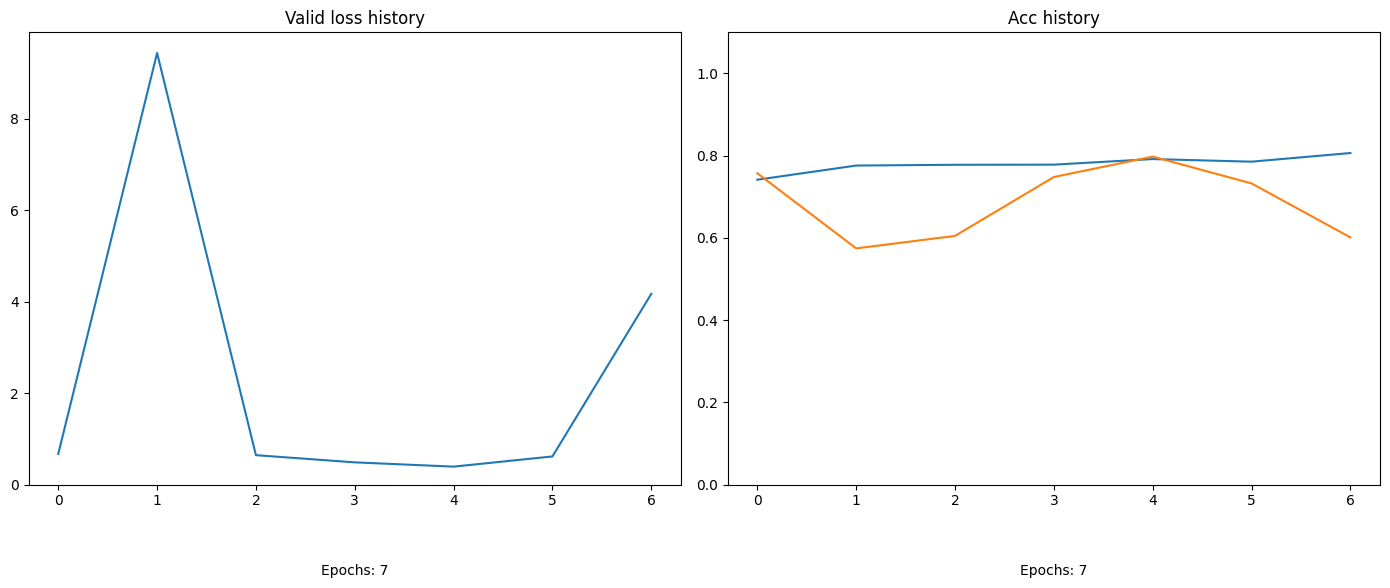

In [ ]:
# обучаем модель
model.to(device)
train_epoch_acc = []
train_epoch_losses = []
valid_epoch_losses = []
valid_epoch_acc = []

model.to(device)
for epoch in range(7):
    model.train()
    loss_batch = []
    acc_batch  = []

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)

        loss = criterion(preds.squeeze(-1), labels.float())

        loss_batch.append(loss.item())
        acc_batch.append(compute_batch_accuracy(preds, labels))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_epoch_losses.append(np.mean(loss_batch))
    train_epoch_acc.append(np.mean(acc_batch))

    model.eval()
    loss_batch = []
    acc_batch  = []
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        loss = criterion(preds.squeeze(-1), labels.float())

        loss_batch.append(loss.item())
        acc_batch.append(compute_batch_accuracy(preds, labels))

    valid_epoch_losses.append(np.mean(loss_batch))
    valid_epoch_acc.append(np.mean(acc_batch))

    print(f'Epoch train: {epoch+1:02}, accuracy: {train_epoch_acc[-1]:.3f}, loss: {train_epoch_losses[-1]:.3f}')
    print(f'Epoch valid: {epoch+1:02}, accuracy: {valid_epoch_acc[-1]:.3f}, loss: {valid_epoch_losses[-1]:.3f}')

# Отображение графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# plt.subplots_adjust(hspace=0.5)


# Первый график - функция потерь (loss)
ax[0].plot(valid_epoch_losses)
ax[0].set_ylim((0, np.max(train_epoch_losses.extend(valid_epoch_losses))))
ax[0].set_title('Valid loss history')
ax[0].text(0.5, -0.2, f'Epochs: {len(valid_epoch_losses)}', transform=ax[0].transAxes, ha='center')

# Второй график - точность (accuracy)
ax[1].plot(train_epoch_acc)
ax[1].plot(valid_epoch_acc)
ax[1].set_ylim(0, 1.1)
ax[1].set_title('Acc history')
ax[1].text(0.5, -0.2, f'Epochs: {len(train_epoch_acc)}', transform=ax[1].transAxes, ha='center')

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), "resnet18_weights.pth")

model = model

torch.save(model.state_dict(), 'model.pth')